# LO boundaries, observations, and Salish Sea

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.gridspec import GridSpec
import cmocean as cm
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
grid = xr.open_dataset('/ocean/rbeutel/MOAD/biogeo_paper/FRDR/grid.nc')

/home/rbeutel/anaconda3/envs/LO/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:394: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


Text(0.99, 0.99, 'British\nColumbia')

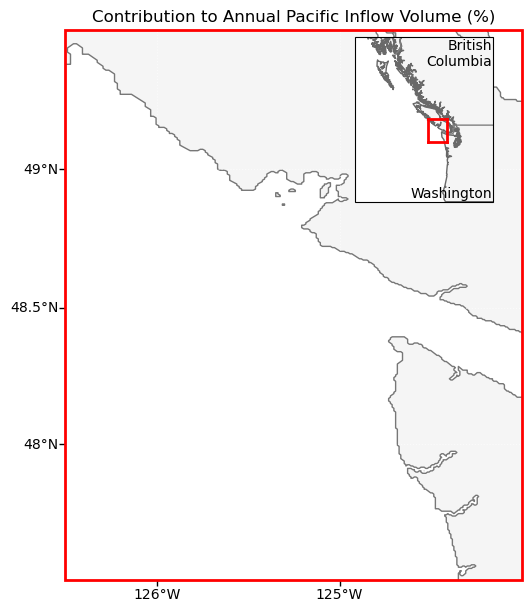

In [4]:
# plot for key figure background

xlim, ylim = [-126.5, -124], [47.5, 49.5]
proj= crs.Mercator(np.mean(xlim), *ylim)

fig = plt.figure(constrained_layout=True, figsize=[6,6])
gs = GridSpec(1, 1, figure=fig)
ax0 = fig.add_subplot(gs[:,:], projection=proj)

ax0.set_extent(xlim+ylim)

ax0.set_title('Contribution to Annual Pacific Inflow Volume (%)')

#Depth
X, Y = grid.lon_rho, grid.lat_rho
ax0.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax0.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax0.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.4)

# Draw coastline
ax0.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1,transform=crs.PlateCarree())
ax0.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=1, transform=crs.PlateCarree(),alpha=0.9)

# Add gridlines
ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+0.5,0.5) for l in [ylim]][0]
xlocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1,1) for l in [xlim]][0]
gl = ax0.gridlines(linestyle=":", color='w', alpha=0.6, draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.right_labels = False
gl.top_labels = False


# # Manually add ticks at the grid locations
ax0.set_xticks([-126,-125], crs=crs.PlateCarree())  
ax0.set_yticks([48,48.5,49], crs=crs.PlateCarree())
ax0.set_xticklabels([],)  
ax0.set_yticklabels([],)
ax0.tick_params(
    axis='x', direction='out', length=4, width=1, color='black', top=False, bottom=True  # Ticks only on top
)
ax0.tick_params(
    axis='y', direction='out', length=4, width=1, color='black', left=True, right=False  # Ticks only on right
)
#make border match inset
for spine in ax0.spines.values():
        spine.set_edgecolor('red')
        spine.set_linewidth(2)

# nice lil inset map
xlim_in, ylim_in = [-136, -118], [42, 56]
proj= crs.Mercator(np.mean(xlim_in), *ylim_in)
axins = inset_axes(ax0, width="40%", height="30%", loc="upper right", 
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=proj))

# Make plot area
axins.set_extent(xlim_in + ylim_in)

# Draw coastline
axins.add_feature(feature.GSHHSFeature('low', edgecolor='dimgray', facecolor='whitesmoke'), zorder=1)
axins.add_feature(feature.BORDERS, edgecolor='gray', zorder=1)

# make lil box in plot area to show region limits
axins.plot([xlim[0],xlim[1]],[ylim[0],ylim[0]],c='r',lw=2, zorder=6,transform=crs.PlateCarree())
axins.plot([xlim[0],xlim[1]],[ylim[1],ylim[1]],c='r',lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot([xlim[0],xlim[0]],[ylim[0],ylim[1]],c='r',lw=2, zorder=6, transform=crs.PlateCarree())
axins.plot([xlim[1],xlim[1]],[ylim[0],ylim[1]],c='r',lw=2, zorder=6, transform=crs.PlateCarree())

# label washington and British Columbia
axins.text(0.99, .01, 'Washington', ha='right', va='bottom', transform=axins.transAxes, fontsize=10)
axins.text(0.99, .99, 'British\nColumbia', ha='right', va='top', transform=axins.transAxes, fontsize=10)

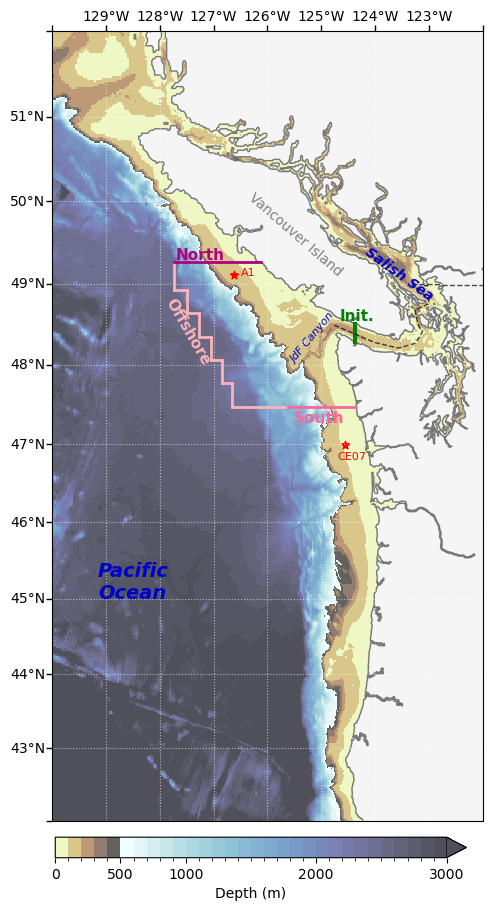

In [6]:
xlim, ylim = [-150, -115], [33, 62]
proj= crs.Mercator(np.mean(xlim), *ylim)

fig = plt.figure(constrained_layout=True, figsize=[7,9])
gs = GridSpec(1, 1, figure=fig)
ax0 = fig.add_subplot(gs[:,:], projection=proj)

#######################
# Analysis Boundaries #
#######################

# Make plot area
xlim, ylim = [-130, -122], [42, 52]
ax0.set_extent(xlim+ylim)

#Depth
X, Y = grid.lon_rho, grid.lat_rho

# Create custom colormap
colors1 = cm.cm.turbid(np.linspace(0, 1, 5))  # First colormap from 0 to 200m
colors2 = cm.cm.ice_r(np.linspace(0, 1, 25))  # Second colormap from 200m to 2000m
colors = np.vstack((colors1, colors2))
custom_cmap = ListedColormap(colors, name='CustomCMap')

# Create a normalization instance that maps the depths to the combined colormap
bounds = np.concatenate([np.arange(0, 500, 100), np.arange(500, 3001, 100)])
norm = BoundaryNorm(bounds, custom_cmap.N)

# Plot the depth data using the custom colormap
c = ax0.pcolormesh(X, Y, grid.h, cmap=custom_cmap, norm=norm, transform=crs.PlateCarree(), zorder=0,alpha=0.7)

cbar = plt.colorbar(c, ax=ax0, orientation='horizontal', fraction=0.026, pad=0.02, ticks=[0, 500, 1000, 2000,3000], extend='max')
cbar.set_label('Depth (m)')
cbar.ax.set_xticklabels(['0', '500', '1000', '2000','3000'])

# Draw coastline
ax0.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1,transform=crs.PlateCarree())
ax0.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray',zorder=1, transform=crs.PlateCarree(),alpha=0.9)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax0.gridlines(linestyle=":", color='w', alpha=0.6, draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.right_labels = False
gl.bottom_labels = False


# Manually add ticks at the grid locations
ax0.set_xticks(xlocs, crs=crs.PlateCarree())  
ax0.set_yticks(ylocs, crs=crs.PlateCarree())
ax0.set_xticklabels([],)  
ax0.set_yticklabels([],)
ax0.tick_params(
    axis='x', direction='out', length=4, width=1, color='black', top=True, bottom=False  # Ticks only on top
)
ax0.tick_params(
    axis='y', direction='out', length=4, width=1, color='black', left=True, right=False  # Ticks only on right
)

# add cross sections
ax0.plot([grid.lon_rho[0,316],grid.lon_rho[0,316]],[grid.lat_rho[ 896,0],grid.lat_rho[ 945,0]],lw=3, c='green',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,117],grid.lon_rho[0,128]],[grid.lat_rho[ 781,0],grid.lat_rho[ 781,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,106],grid.lon_rho[0,117]],[grid.lat_rho[ 845,0],grid.lat_rho[ 845,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 95],grid.lon_rho[0,106]],[grid.lat_rho[ 909,0],grid.lat_rho[ 909,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 84],grid.lon_rho[0, 95]],[grid.lat_rho[ 974,0],grid.lat_rho[ 974,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 73],grid.lon_rho[0, 84]],[grid.lat_rho[1038,0],grid.lat_rho[1038,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 73],grid.lon_rho[0, 73]],[grid.lat_rho[1038,0],grid.lat_rho[1102,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 84],grid.lon_rho[0, 84]],[grid.lat_rho[ 974,0],grid.lat_rho[1038,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 95],grid.lon_rho[0, 95]],[grid.lat_rho[ 909,0],grid.lat_rho[ 974,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,106],grid.lon_rho[0,106]],[grid.lat_rho[ 845,0],grid.lat_rho[ 909,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,117],grid.lon_rho[0,117]],[grid.lat_rho[ 781,0],grid.lat_rho[ 845,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,128],grid.lon_rho[0,128]],[grid.lat_rho[ 714,0],grid.lat_rho[ 781,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,194],grid.lon_rho[0,316]],[grid.lat_rho[ 714,0],grid.lat_rho[ 714,0]], lw=2, c='#f768a1',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0,128],grid.lon_rho[0,193]],[grid.lat_rho[ 714,0],grid.lat_rho[ 714,0]], lw=2, c='#fbb4b9',transform=crs.PlateCarree())
ax0.plot([grid.lon_rho[0, 73],grid.lon_rho[0,161]],[grid.lat_rho[1103,0],grid.lat_rho[1103,0]], lw=2, c='#ae017e',transform=crs.PlateCarree())

# mooring locations
ax0.scatter([-126.616534,-124.56771], [49.110482,46.98805],color='r',marker='*',transform=crs.PlateCarree())

# add canada USA border
ax0.add_feature(feature.BORDERS, linestyle='dashed', edgecolor='k', alpha=0.7, zorder=3)

# Add annotations
ax0.text(-128.5, 45, 'Pacific\nOcean', transform=crs.PlateCarree(),fontsize=14, color='mediumblue',  weight='bold', fontstyle='italic',horizontalalignment='center',zorder=4)
ax0.text(-124.23, 48.8, 'Salish Sea', fontstyle='italic', weight='bold', c='mediumblue',fontsize=10,transform=crs.PlateCarree(),rotation=-36,zorder=4)
ax0.text(-126.4, 49.1, 'Vancouver Island', c='grey',fontsize=10, transform=crs.PlateCarree(),rotation=-41,zorder=4)
ax0.text(-125.6, 48.03, 'JdF Canyon', transform=crs.PlateCarree(),fontsize=8, color='mediumblue', fontstyle='italic',rotation=50,zorder=4)

ax0.text(-127.7, 49.3, 'North', transform=crs.PlateCarree(),weight='bold',fontsize=11, color='#ae017e',zorder=4)
ax0.text(-125.5, 47.28, 'South', transform=crs.PlateCarree(),weight='bold',fontsize=11, color='#f768a1',zorder=4)
ax0.text(-127.95, 48, 'Offshore', transform=crs.PlateCarree(),weight='bold',fontsize=11, color='#fbb4b9',rotation=-60,zorder=4)
ax0.text(-124.65, 48.55, 'Init.', transform=crs.PlateCarree(),weight='bold',fontsize=11, color='green',zorder=4)

ax0.text(-124.7, 46.8, 'CE07', transform=crs.PlateCarree(),fontsize=8, color='r',zorder=4)
ax0.text(-126.5, 49.1, 'A1', transform=crs.PlateCarree(),fontsize=8, color='r',zorder=4)

plt.savefig("/ocean/rbeutel/MOAD/biogeo_paper/PI_BIOGEO_PAPER/model/figures/map.jpg")

In [23]:
# interested to know the lowest resolution within the analysis domain
from math import sin, cos, sqrt, atan2, radians

def dist_earth(lat1,lat2,lon1,lon2):
    # approximate distance between two cells

    # Approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

# assume that they're somehere on the north or south (full line) transect

# south transect
lons = grid.lon_rho[0, 128:317]
lat = grid.lat_rho[714,0]
print([dist_earth(lat,lat,lons[i],lons[i+1]) for i in range(len(lons)-1)])

# north transect 
lons = grid.lon_rho[0, 73:162]
lat = grid.lat_rho[1103,0]
print([dist_earth(lat,lat,lons[i],lons[i+1]) for i in range(len(lons)-1)])


[1.297699731755899, 1.2925602158783254, 1.2874410549562427, 1.2823421683776177, 1.277263475844163, 1.2722048973789915, 1.2671663533227895, 1.2621477643242514, 1.2571490513553847, 1.2521701357000306, 1.2472109389442998, 1.2422713829976149, 1.2373513900697546, 1.2324508826842457, 1.2275697836687964, 1.222708016155296, 1.217865503579817, 1.2130421696902647, 1.2082379385234228, 1.203452734425996, 1.1986864820393044, 1.193939106308852, 1.1892105324728435, 1.184500686066015, 1.1798094929177187, 1.175136879153836, 1.1704827711910386, 1.1658470957387015, 1.1612297797912507, 1.1566307506377291, 1.1520499358560556, 1.1474872633072883, 1.1429426611356226, 1.138416057781783, 1.1339073819524141, 1.1294165626526043, 1.1249435291629257, 1.120488211035611, 1.1160505381117696, 1.1116304405156485, 1.1072278486297633, 1.1028426931331576, 1.0984749049574052, 1.0941244153306073, 1.089791155735309, 1.085475057935278, 1.0811760539640298, 1.076894076115259, 1.0726290569638866, 1.0683809293373612, 1.0641496263